# Этап I. Построение модели логистической регрессии на обучающей выборке - части исторической выборки и ее проверка на контрольной выборке - части исторической выборки с помощью класса LogisticRegression

In [1]:
# импортируем необходимые библиотеки
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rc('font', family='Verdana')

## I.1. Загрузка исторических данных

In [2]:
# записываем CSV-файл в объект DataFrame
data = pd.read_csv('Data/Churn_logreg.csv', 
                   encoding='cp1251', sep=';')

## I.2. Вывод общей информации о датафрейме

In [3]:
# выводим первые 5 наблюдений датафрейма
data.head()

,longdist,internat,local,int_disc,billtype,pay,age,gender,marital,children,income,churn
0,"27,09",0,"39,74",Нет,Бюджетный,CC,35.0,Женский,Женат,0.0,77680,Остается
1,NaN,0,"46,31",Нет,NaN,NaN,53.0,Мужской,Одинокий,1.0,"37111,5",Остается
2,"23,76",0,NaN,NaN,Бюджетный,Auto,NaN,Женский,NaN,1.0,"37079,4",Остается
3,"9,4",NaN,"13,9",Нет,NaN,CH,NaN,Мужской,Одинокий,NaN,81997,Остается
4,"14,15",0,"108,43",Да,Бесплатный,Auto,39.0,Женский,Одинокий,0.0,"16829,6",Остается


## I.3. Изменение типов переменных

In [4]:
# смотрим типы переменных
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4431 entries, 0 to 4430
Data columns (total 12 columns):
longdist    4430 non-null object
internat    4427 non-null object
local       4428 non-null object
int_disc    4430 non-null object
billtype    4427 non-null object
pay         4429 non-null object
age         4428 non-null float64
gender      4430 non-null object
marital     4427 non-null object
children    4430 non-null float64
income      4430 non-null object
churn       4431 non-null object
dtypes: float64(2), object(10)
memory usage: 415.5+ KB


In [5]:
# заменяем запятые на точки и преобразуем в тип float
for i in ['longdist', 'internat', 'local', 'income']:
    data[i] = data[i].str.replace(',', '.').astype('float')
data.head()

,longdist,internat,local,int_disc,billtype,pay,age,gender,marital,children,income,churn
0,27.09,0.0,39.74,Нет,Бюджетный,CC,35.0,Женский,Женат,0.0,77680.0,Остается
1,NaN,0.0,46.31,Нет,NaN,NaN,53.0,Мужской,Одинокий,1.0,37111.5,Остается
2,23.76,0.0,NaN,NaN,Бюджетный,Auto,NaN,Женский,NaN,1.0,37079.4,Остается
3,9.40,NaN,13.90,Нет,NaN,CH,NaN,Мужской,Одинокий,NaN,81997.0,Остается
4,14.15,0.0,108.43,Да,Бесплатный,Auto,39.0,Женский,Одинокий,0.0,16829.6,Остается


In [6]:
# смотрим типы переменных
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4431 entries, 0 to 4430
Data columns (total 12 columns):
longdist    4430 non-null float64
internat    4427 non-null float64
local       4428 non-null float64
int_disc    4430 non-null object
billtype    4427 non-null object
pay         4429 non-null object
age         4428 non-null float64
gender      4430 non-null object
marital     4427 non-null object
children    4430 non-null float64
income      4430 non-null float64
churn       4431 non-null object
dtypes: float64(6), object(6)
memory usage: 415.5+ KB


## I.4. Получение подробной информации о количественных и категориальных переменных

In [7]:
# смотрим статистики для количественных переменных
data.describe()

,longdist,internat,local,age,children,income
count,4430.000000,4427.000000,4428.000000,4428.000000,4430.000000,4430.000000
mean,13.638023,0.835044,51.361093,57.562331,0.988939,50296.423896
std,9.393025,2.233639,54.685012,22.832404,0.824448,28439.435264
min,0.000000,0.000000,0.050000,18.000000,0.000000,110.280000
25%,5.170000,0.000000,13.460000,38.000000,0.000000,25445.600000
50%,13.680000,0.000000,35.010000,58.000000,1.000000,50290.700000
75%,22.080000,0.000000,71.660000,77.000000,2.000000,75004.500000
max,29.980000,9.950000,450.620000,97.000000,2.000000,99832.900000


In [8]:
# смотрим статистики для категориальных переменных,
# кроме зависимой переменной churn, создав список
# категориальных переменных
categorical_columns = [c for c in data.loc[:, data.columns != 'churn'] if data[c].dtype.name == 'object']
data[categorical_columns].describe()

,int_disc,billtype,pay,gender,marital
count,4430,4427,4429,4430,4427
unique,2,2,4,4,5
top,Нет,Бюджетный,CC,Женский,Женат
freq,3054,2244,2561,2240,2620


In [9]:
# смотрим уникальные значения
# категориальных переменных
for c in categorical_columns:
    print(data[c].unique())

['Нет' nan 'Да']
['Бюджетный' nan 'Бесплатный']
['CC' nan 'Auto' 'CH' 'CD']
['Женский' 'Мужской' nan 'Женский&*' 'Мужской&*']
['Женат' 'Одинокий' nan '_Одинокий' '_Женат' 'Же&нат']


In [10]:
# смотрим частоты категорий для
# категориальных переменных
for c in categorical_columns:
    print(data[c].value_counts(dropna=False))

Нет    3054
Да     1376
NaN       1
Name: int_disc, dtype: int64
Бюджетный     2244
Бесплатный    2183
NaN              4
Name: billtype, dtype: int64
CC      2561
CH       977
Auto     889
CD         2
NaN        2
Name: pay, dtype: int64
Женский      2240
Мужской      2183
Женский&*       4
Мужской&*       3
NaN             1
Name: gender, dtype: int64
Женат        2620
Одинокий     1800
NaN             4
_Женат          3
_Одинокий       2
Же&нат          2
Name: marital, dtype: int64


## I.5. Нормализация строковых значений и обработка редких категорий

In [11]:
# удаляем лишние символы в категориях переменных
# gender и marital
for i in ['gender', 'marital']:
    data[i] = data[i].str.replace('[*&_]', '')

# смотрим результаты
for i in ['gender', 'marital']:
    print(data[i].value_counts(dropna=False))

Женский    2244
Мужской    2186
NaN           1
Name: gender, dtype: int64
Женат       2625
Одинокий    1802
NaN            4
Name: marital, dtype: int64


In [12]:
# заменяем редкую категорию модой
data.at[data['pay'] == 'CD', 'pay'] = 'CC'
data['pay'].value_counts(dropna=False)

CC      2563
CH       977
Auto     889
NaN        2
Name: pay, dtype: int64

## I.6. Конструирование признаков

In [13]:
# пишем функцию, создающую парные взаимодействия
def make_conj(df, feature1, feature2):
    df[feature1 + "_" + feature2] = df[feature1].astype('object') + " + " + df[feature2].astype('object')

In [14]:
# применяем функцию
make_conj(data, 'gender', 'marital')

In [15]:
# поделим возраст на длительность междугородних звонков в минутах
data['ratio'] = data['age'] / data['longdist']
# заменяем бесконечные значения на 1
data['ratio'].replace([np.inf, -np.inf], 1, inplace=True)

In [16]:
# поделим длительность междугородних звонков в минутах на
# длительность международных звонков в минутах
data['ratio2'] = data['longdist'] / data['internat']
# заменяем бесконечные значения на 0
data['ratio2'].replace([np.inf, -np.inf], 0, inplace=True)

In [17]:
# поделим доход на возраст
data['ratio3'] = data['income'] / data['age']
# заменяем бесконечные значения на 0
data['ratio3'].replace([np.inf, -np.inf], 0, inplace=True)

In [18]:
# поделим возраст на количество детей
data['ratio4'] = data['age'] / data['children']
# заменяем бесконечные значения на 0
data['ratio4'].replace([np.inf, -np.inf], 0, inplace=True)

## I.7. Разбиение набора данных на обучающую и контрольную выборки

In [19]:
# разбиваем данные на обучающую и контрольную выборки
train = data.sample(frac=0.7, random_state=200)
test = data.drop(train.index)

## I.8. Импутация пропусков

In [20]:
# выводим информацию о количестве пропусков
# по каждой переменной в полученных выборках
print(train.isnull().sum())
print(test.isnull().sum())

longdist            1
internat            4
local               2
int_disc            0
billtype            4
pay                 2
age                 2
gender              1
marital             3
children            1
income              1
churn               0
gender_marital      3
ratio               3
ratio2            336
ratio3              2
ratio4              2
dtype: int64
longdist            0
internat            0
local               1
int_disc            1
billtype            0
pay                 0
age                 1
gender              0
marital             1
children            0
income              0
churn               0
gender_marital      1
ratio               1
ratio2            161
ratio3              1
ratio4              1
dtype: int64


In [21]:
# заменяем пропуски в количественных переменных средними, создав
# список количественных переменных для работы с циклом
numerical_columns = train.dtypes[train.dtypes != 'object'].index 
for i in numerical_columns:
    train[i].fillna(train[i].mean(), inplace=True)
    test[i].fillna(train[i].mean(), inplace=True)

In [22]:
# заменяем пропуски в категориальных переменных модой, не забываем пересоздать список
# категориальных предикторов для работы с циклом, потому что появилась новая переменная
# gender_marital и в ней есть пропуски, нуждающиеся в импутации
categorical_columns = [c for c in train.loc[:, train.columns != 'churn'] if data[c].dtype.name == 'object']
for i in categorical_columns:
    train[i].fillna(train[i].value_counts().index[0], inplace=True)
    test[i].fillna(train[i].value_counts().index[0], inplace=True)

## I.9. Нормализация

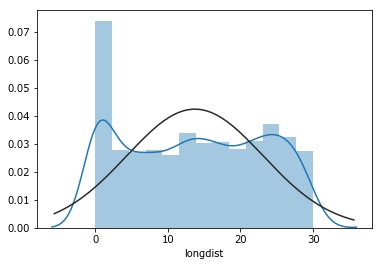

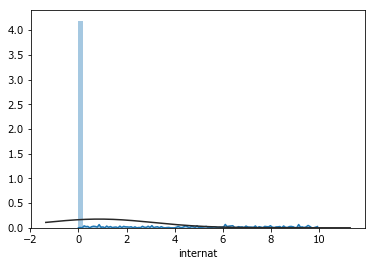

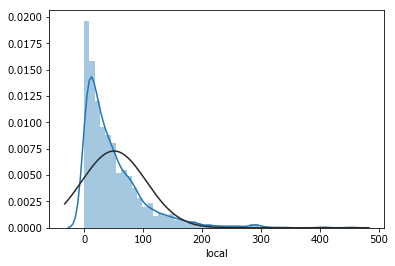

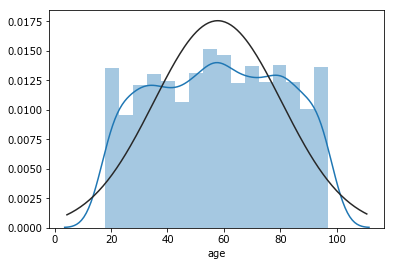

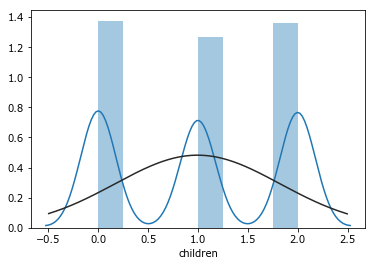

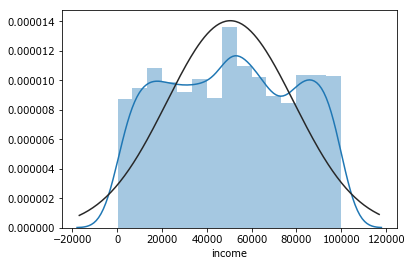

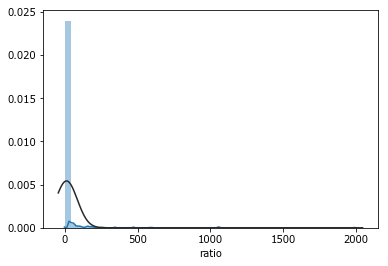

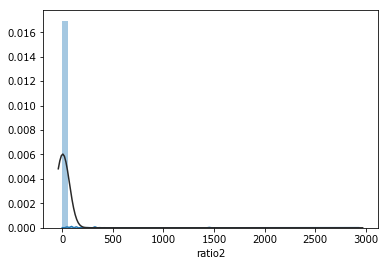

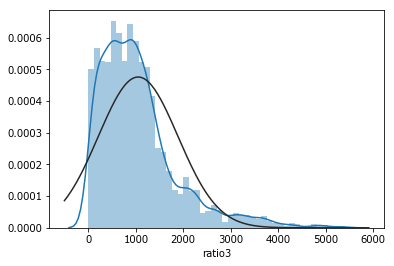

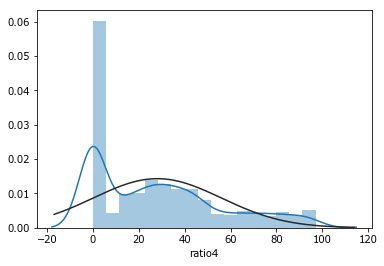

<Figure size 432x288 with 0 Axes>

In [23]:
# импортируем библиотеку seaborn, предварительно 
# установив ее в Anaconda Prompt с помощью команды
# conda install -c anaconda seaborn
import seaborn as sns

# импортируем norm и stats
from scipy import stats
from scipy.stats import norm

# строим гистограмму распределения 
# для количественных переменных
for i in numerical_columns:
    sns.distplot(train[i], fit=norm)
    fig = plt.figure()    

In [24]:
# подготавливаем данные перед преобразованием Бокса-Кокса
# (данные должны быть положительными)
train.replace({0: 0.5}, inplace=True)
test.replace({0: 0.5}, inplace=True)

In [25]:
# выполняем преобразование Бокса-Кокса
from scipy.stats import boxcox
for i in numerical_columns:  
    train[i], fitted_lambda = boxcox(train[i])     
    test[i] = boxcox(test[i], fitted_lambda)   

## I.10. Стандартизация

In [26]:
# выполняем стандартизацию количественных переменных
train_copy = train.copy()
for i in numerical_columns:    
    train[i] = (train[i] - train[i].mean()) / train[i].std()
    test[i] = (test[i] - train_copy[i].mean()) / train_copy[i].std()

## I.11. Проверка наличия пропусков

In [27]:
# смотрим пропуски
print(train.isnull().sum())
print(test.isnull().sum())

longdist          0
internat          0
local             0
int_disc          0
billtype          0
pay               0
age               0
gender            0
marital           0
children          0
income            0
churn             0
gender_marital    0
ratio             0
ratio2            0
ratio3            0
ratio4            0
dtype: int64
longdist          0
internat          0
local             0
int_disc          0
billtype          0
pay               0
age               0
gender            0
marital           0
children          0
income            0
churn             0
gender_marital    0
ratio             0
ratio2            0
ratio3            0
ratio4            0
dtype: int64


## I.12. Дамми-кодирование

In [28]:
# печатаем названия столбцов до и после
# дамми-кодирования
print("Исходные переменные:\n", list(train.columns), "\n")
train_dummies = pd.get_dummies(train)
print("Переменные после get_dummies:\n", list(train_dummies.columns))

print("Исходные переменные:\n", list(test.columns), "\n")
test_dummies = pd.get_dummies(test)
print("Переменные после get_dummies:\n", list(test_dummies.columns))

Исходные переменные:
 ['longdist', 'internat', 'local', 'int_disc', 'billtype', 'pay', 'age', 'gender', 'marital', 'children', 'income', 'churn', 'gender_marital', 'ratio', 'ratio2', 'ratio3', 'ratio4'] 

Переменные после get_dummies:
 ['longdist', 'internat', 'local', 'age', 'children', 'income', 'ratio', 'ratio2', 'ratio3', 'ratio4', 'int_disc_Да', 'int_disc_Нет', 'billtype_Бесплатный', 'billtype_Бюджетный', 'pay_Auto', 'pay_CC', 'pay_CH', 'gender_Женский', 'gender_Мужской', 'marital_Женат', 'marital_Одинокий', 'churn_Остается', 'churn_Уходит', 'gender_marital_Женский + Женат', 'gender_marital_Женский + Одинокий', 'gender_marital_Мужской + Женат', 'gender_marital_Мужской + Одинокий']
Исходные переменные:
 ['longdist', 'internat', 'local', 'int_disc', 'billtype', 'pay', 'age', 'gender', 'marital', 'children', 'income', 'churn', 'gender_marital', 'ratio', 'ratio2', 'ratio3', 'ratio4'] 

Переменные после get_dummies:
 ['longdist', 'internat', 'local', 'age', 'children', 'income', 'ratio

## I.13. Подготовка массивов признаков и массивов меток

In [29]:
# создаем обучающий и контрольный массивы меток
y_train = train_dummies.loc[:, 'churn_Уходит']
y_test = test_dummies.loc[:, 'churn_Уходит']
# создаем обучающий и контрольный массивы признаков
train_dummies.drop(['churn_Остается', 'churn_Уходит'], axis=1, inplace=True)
test_dummies.drop(['churn_Остается', 'churn_Уходит'], axis=1, inplace=True)
X_train = train_dummies.loc[:, 'longdist':'gender_marital_Мужской + Одинокий']
X_test = test_dummies.loc[:, 'longdist':'gender_marital_Мужской + Одинокий']

## I.14. Построение модели

In [30]:
# импортируем класс LogisticRegression
from sklearn.linear_model import LogisticRegression
# создаем экземпляр класса LogisticRegression 
# (по сути задаем модель) и обучаем
logreg = LogisticRegression(solver='lbfgs', max_iter=200).fit(X_train, y_train)
# печатаем значения правильности
print("Правильность на обучающей выборке: {:.3f}".format(
    logreg.score(X_train, y_train)))
print("Правильность на контрольной выборке: {:.3f}".format(
    logreg.score(X_test, y_test)))

Правильность на обучающей выборке: 0.812
Правильность на контрольной выборке: 0.809


In [31]:
# импортируем функцию roc_auc_score для вычисления AUC
from sklearn.metrics import roc_auc_score
# печатаем значения AUC
print("AUC на обучающей выборке: {:.3f}".format(
    roc_auc_score(y_train, logreg.predict_proba(X_train)[:, 1])))
print("AUC на контрольной выборке: {:.3f}".format(
    roc_auc_score(y_test, logreg.predict_proba(X_test)[:, 1])))

AUC на обучающей выборке: 0.885
AUC на контрольной выборке: 0.888


## I.15. Получение информации о регрессионных и экспоненциальных коэффициентах

In [32]:
# взглянем на коэффициенты логистической регрессии,
# запишем коэффициенты и названия предикторов
# в отдельные объекты
coef = logreg.coef_
feat_labels = X_train.columns

In [33]:
# вычислим свободный член (константу)
intercept = logreg.intercept_
intercept

array([-0.46223965])

In [34]:
# переводим массив в скаляр
intercept = round(np.asscalar(intercept), 2)
intercept

-0.46

In [35]:
# печатаем название "Константа"    
print("Константа:", intercept)
# печатаем название "Коэффициенты"
print("Коэффициенты:")
# для удобства сопоставим каждому названию 
# предиктора соответствующий коэффициент
for c, feature in zip(coef[0], feat_labels):
    print(feature, round(c, 2))

Константа: -0.46
Коэффициенты:
longdist -0.9
internat 1.1
local -0.1
age 0.05
children -0.17
income 0.51
ratio -0.75
ratio2 0.28
ratio3 -0.89
ratio4 0.18
int_disc_Да -0.07
int_disc_Нет 0.06
billtype_Бесплатный 0.06
billtype_Бюджетный -0.06
pay_Auto -0.19
pay_CC 0.11
pay_CH 0.09
gender_Женский 1.18
gender_Мужской -1.18
marital_Женат -0.02
marital_Одинокий 0.02
gender_marital_Женский + Женат 0.32
gender_marital_Женский + Одинокий 0.3
gender_marital_Мужской + Женат -0.34
gender_marital_Мужской + Одинокий -0.28


In [36]:
# вычислим экспоненциальные коэффициенты
# и запишем их в отдельный объект
exp_coef = np.round(np.exp(coef), 3)

# печатаем название "Константа"    
print("Константа:", intercept)
# печатаем название "Экспоненциальные коэффициенты"
print("Экспоненциальные коэффициенты:")
# для удобства сопоставим каждому названию 
# предиктора соответствующий коэффициент
for c, feature in zip(exp_coef[0], feat_labels):
    print(feature, c)

Константа: -0.46
Экспоненциальные коэффициенты:
longdist 0.408
internat 2.997
local 0.906
age 1.049
children 0.841
income 1.659
ratio 0.473
ratio2 1.318
ratio3 0.409
ratio4 1.199
int_disc_Да 0.937
int_disc_Нет 1.067
billtype_Бесплатный 1.065
billtype_Бюджетный 0.939
pay_Auto 0.823
pay_CC 1.113
pay_CH 1.091
gender_Женский 3.254
gender_Мужской 0.307
marital_Женат 0.977
marital_Одинокий 1.023
gender_marital_Женский + Женат 1.376
gender_marital_Женский + Одинокий 1.353
gender_marital_Мужской + Женат 0.71
gender_marital_Мужской + Одинокий 0.756


## I.16. Поиск оптимального значения силы регуляризации

In [37]:
# импортируем класс StratifiedKFold
from sklearn.model_selection import StratifiedKFold
# создаем экземпляр класса StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
# импортируем класс GridSearchCV
from sklearn.model_selection import GridSearchCV
# создаем экземпляр класса LogisticRegression,
# логистическую регрессию с L1-регуляризацией
logreg_grid = LogisticRegression(solver='lbfgs', max_iter=200, penalty='l2', random_state=42)
# задаем сетку гиперпараметров, будем перебирать 
# разные значения штрафа
param_grid_logreg = {'C': [0.2, 0.4, 0.6, 0.8, 1]}
# создаем экземпляр класса GridSearchCV
grid_search = GridSearchCV(logreg_grid, param_grid_logreg, 
                           scoring='roc_auc', 
                           n_jobs=-1, cv=skf)
# запускаем решетчатый поиск
grid_search.fit(X_train, y_train)
# проверяем модель со значением гиперпараметра C, дающим наибольшее
# значение AUC (усредненное по контрольным блокам перекрестной
# проверки), на тестовой выборке
test_score = roc_auc_score(y_test, grid_search.predict_proba(X_test)[:, 1])
# смотрим результаты решетчатого поиска
print("AUC на тестовой выборке: {:.3f}".format(test_score))
print("Наилучшее значение гиперпараметра C: {}".format(grid_search.best_params_))
print("Наилучшее значение AUC: {:.3f}".format(grid_search.best_score_))

AUC на тестовой выборке: 0.888
Наилучшее значение гиперпараметра C: {'C': 0.2}
Наилучшее значение AUC: 0.883


# Этап II. Построение модели логистической регрессии на всей исторической выборке и применение к новым данным с помощью класса LogisticRegression

## II.1. Загрузка исторических данных

In [38]:
# записываем CSV-файл в объект DataFrame
fulldata = pd.read_csv('Data/Churn_logreg.csv', 
                       encoding='cp1251', sep=';')

## II.2. Предварительная обработка исторических данных

In [39]:
# пишем функцию, выполняющую предварительную обработку
# исторических данных
def preprocessing(df):
    # заменяем запятые на точки и преобразуем в тип float
    for i in ['longdist', 'internat', 'local', 'income']:
        df[i] = df[i].str.replace(',', '.').astype('float')
    # удаляем возможные лишние символы (все символы, не являющиеся 
    # буквами, символы нижнего подчеркивания и цифры) в категориях 
    # переменных gender и marital
    for i in ['gender', 'marital']:
        df[i] = df[i].str.replace('[\d+\W_]', '')
    # все новые категории переменной pay заменяем модой
    replace_new_values = lambda s: 'CC' if s not in ['CC', 'Auto', 'CH', np.NaN] else s
    df['pay'] = df['pay'].map(replace_new_values)
    # создаем переменную - результат конъюнкции
    df['gender_marital'] = df['gender'].astype('object') + " + " + df['marital'].astype('object')
    # поделим возраст на длительность междугородних звонков в минутах
    df['ratio'] = df['age'] / df['longdist']
    # заменяем бесконечные значения на 1
    df['ratio'].replace([np.inf, -np.inf], 1, inplace=True)
    # поделим длительность междугородних звонков в минутах на
    # длительность международных звонков в минутах
    df['ratio2'] = df['longdist'] / df['internat']
    # заменяем бесконечные значения на 0
    df['ratio2'].replace([np.inf, -np.inf], 0, inplace=True)
    # поделим доход на возраст
    df['ratio3'] = df['income'] / df['age']
    # заменяем бесконечные значения на 0
    df['ratio3'].replace([np.inf, -np.inf], 0, inplace=True)
    # поделим возраст на количество детей
    df['ratio4'] = df['age'] / df['children']
    # заменяем бесконечные значения на 0
    df['ratio4'].replace([np.inf, -np.inf], 0, inplace=True)
    # заменяем пропуски в количественных переменных средними, создав
    # список количественных переменных для работы с циклом
    numerical_columns = df.dtypes[df.dtypes != 'object'].index 
    for i in numerical_columns:
        df[i].fillna(df[i].mean(), inplace=True)
    # заменяем пропуски в категориальных переменных модами, создав
    # список категориальных переменных для работы с циклом
    categorical_columns = df.dtypes[df.dtypes == 'object'].index 
    for i in categorical_columns:
        df[i].fillna(df[i].value_counts().index[0], inplace=True)
    # подготавливаем данные перед преобразованием Бокса-Кокса
    # (данные должны быть положительными)
    df.replace({0: 0.5}, inplace=True)
    # выполняем преобразование Бокса-Кокса
    for i in numerical_columns:  
        df[i], fitted_lambda = boxcox(df[i])

In [40]:
# применяем функцию предварительной обработки 
# ко всем историческим данным
preprocessing(fulldata)

In [41]:
# создаем копию набора с историческими данными    
fulldata_copy = fulldata.copy()
# выполняем стандартизацию количественных переменных
numerical_cols = [c for c in fulldata.columns if fulldata[c].dtype.name != 'object']
for i in numerical_cols:
    fulldata[i] = (fulldata[i] - fulldata[i].mean()) / fulldata[i].std()

In [42]:
# выполняем дамми-кодирование
fulldata_dummies = pd.get_dummies(fulldata)
# создаем обучающий массив меток
y = fulldata_dummies.loc[:, 'churn_Уходит'] 
# удаляем из будущего массива признаков результаты
# дамми-кодирования зависимой переменной
fulldata_dummies.drop(['churn_Остается', 'churn_Уходит'], axis=1, inplace=True)   
# создаем обучающий массив признаков
X = fulldata_dummies.loc[:, 'longdist':'gender_marital_Мужской + Одинокий']

## II.3. Обучение модели логистической регрессии на всех исторических данных

In [43]:
# обучаем модель
full_logreg = LogisticRegression(C=0.2, solver='lbfgs', max_iter=200, penalty='l2').fit(X, y)
print("AUC на всей исторической выборке: {:.3f}".format(
    roc_auc_score(y, full_logreg.predict_proba(X)[:, 1])))

AUC на всей исторической выборке: 0.886


## II.4. Загрузка новых данных

In [44]:
# записываем CSV-файл, содержащий новые данные,
# в объект DataFrame
newdata = pd.read_csv('Data/Churn_new.csv', 
                      encoding='utf-8', sep=';')

## II.5. Предварительная обработка новых данных

In [45]:
# выполняем предварительную обработку
# новых данных
preprocessing(newdata)

In [46]:
# выполняем стандартизацию количественных переменных 
for i in numerical_cols:
    newdata[i] = (newdata[i] - fulldata_copy[i].mean()) / fulldata_copy[i].std()

In [47]:
# выполняем дамми-кодирование
# новых данных
newdata_dummies = pd.get_dummies(newdata)

## II.6. Применение модели логистической регрессии, построенной на всех исторических данных, к новым данным

In [48]:
# вычисляем вероятности классов для новых данных
prob = full_logreg.predict_proba(newdata_dummies)
# выведем вероятности для первых 5 наблюдений
prob[:5]

array([[0.04209951, 0.95790049],
       [0.04074118, 0.95925882],
       [0.93378131, 0.06621869],
       [0.96149781, 0.03850219],
       [0.0145843 , 0.9854157 ]])

In [49]:
# создаем на основе вероятностей датафрейм
probabilities = pd.DataFrame(prob, index=newdata.index, columns=['Prob0', 'Prob1'])
# конкатенируем датафрейм с исходными переменными и датафрейм с вероятностями
result = pd.concat([newdata, probabilities], axis=1)
result.head()

,longdist,internat,local,int_disc,billtype,pay,age,gender,marital,children,income,gender_marital,ratio,ratio2,ratio3,ratio4,Prob0,Prob1
0,1.432476,2.574073,0.457483,Нет,Бюджетный,CH,-1.982914,Женский,Одинокий,0.021848,3.547224,Женский + Одинокий,-0.975133,1.128119,2.348438,0.655148,0.042100,0.957900
1,1.299037,2.496011,-0.229161,Да,Бесплатный,CH,-1.827545,Женский,Женат,1.211767,3.938497,Женский + Женат,-0.602935,1.145414,2.028234,0.287901,0.040741,0.959259
2,0.276202,-0.262546,0.392617,Да,Бесплатный,CH,-1.627641,Мужской,Женат,-1.214628,2.001932,Мужской + Женат,0.262985,-0.618638,0.699691,-1.287665,0.933781,0.066219
3,1.773268,-0.262546,1.291012,Нет,Бесплатный,CC,-1.704991,Мужской,Одинокий,0.021848,0.931335,Мужской + Одинокий,-0.638252,-0.618638,0.299497,0.994430,0.961498,0.038502
4,-1.672446,-0.262546,-1.406581,Да,Бесплатный,CH,-1.724840,Женский,Одинокий,1.211767,7.380727,Женский + Одинокий,-1.517753,0.943256,2.972205,0.386932,0.014584,0.985416


# Этап III. Построение модели логистической регрессии на обучающей выборке - части исторической выборки и ее проверка на контрольной выборке - части исторической выборки с помощью класса H2OGeneralizedLinearEstimator библиотеки h2o

In [50]:
# перед импортом библиотеки h2o и модуля os убедитесь, что библиотека h2o установлена 
# (сначала установите Java SE Development Kit 8, обратите внимание, 
# 9-я версия H2O не поддерживается, а затем после установки Java 
# запустите Anaconda Prompt и установите h2o с помощью 
# строки pip install h2o)
import h2o
import os
h2o.init(nthreads = -1, max_mem_size = 8)

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O cluster uptime:,4 hours 41 mins
H2O cluster timezone:,Europe/Moscow
H2O data parsing timezone:,UTC
H2O cluster version:,3.20.0.5
H2O cluster version age:,6 months and 6 days !!!
H2O cluster name:,H2O_from_python_artemgruzdev_4wqni5
H2O cluster total nodes:,1
H2O cluster free memory:,6.507 Gb
H2O cluster total cores:,12
H2O cluster allowed cores:,12
H2O cluster status:,"locked, healthy"


## III.1. Транслитерация строковых значений в предварительно подготовленных исторических данных

In [51]:
# импортируем библиотеку для транслитерации
from transliterate import translit

In [52]:
# сейчас нам надо задать переменные для транслитерации
cat_cols = ['int_disc', 'billtype', 'pay', 'gender', 
            'marital', 'gender_marital']

In [53]:
# выполняем транслитерацию
for i in cat_cols:
    train[i] = train[i].apply(lambda x: translit(x, 'ru', reversed=True))
    test[i] = test[i].apply(lambda x: translit(x, 'ru', reversed=True))

In [54]:
# смотрим результаты транслитерации
# на обучающем наборе
for c in cat_cols:
    print(train[c].unique())

['Net' 'Da']
['Besplatnyj' 'Bjudzhetnyj']
['CC' 'Auto' 'CH']
['Zhenskij' 'Muzhskoj']
['Odinokij' 'Zhenat']
['Zhenskij + Odinokij' 'Muzhskoj + Odinokij' 'Muzhskoj + Zhenat'
 'Zhenskij + Zhenat']


## III.2. Преобразование обучающего и контрольного наборов во фреймы H2O

In [55]:
# преобразовываем датафреймы pandas во фреймы h2o -
# специальную структуру данных, используемую h2o
tr = h2o.H2OFrame(train)
valid = h2o.H2OFrame(test)

/anaconda3/lib/python3.6/site-packages/h2o/utils/shared_utils.py:177: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  data = _handle_python_lists(python_obj.as_matrix().tolist(), -1)[1]


Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


In [56]:
# взглянем на обучающий фрейм, обратите внимание,
# сейчас метод .describe() - это метод h2o, а не 
# pandas
tr.describe()

Rows:3102
Cols:17




,longdist,internat,local,int_disc,billtype,pay,age,gender,marital,children,income,churn,gender_marital,ratio,ratio2,ratio3,ratio4
type,real,real,real,enum,enum,enum,real,enum,enum,real,real,enum,enum,real,real,real,real
mins,-1.922190332680999,-15.225584821239664,-2.86736862186136,,,,-1.857935792107858,,,-1.2055901603877592,-2.1943787395166923,,,-2.330211514783041,-9.503757336578326,-2.8712644967869405,-1.2951323273034068
mean,4.764485789406081e-15,-1.4680639516539973e-14,-5.277841965550811e-15,,,,-1.857631344755195e-14,,,2.3155339679090808e-17,-1.5874888209532756e-15,,,1.9446317928335788e-15,-3.1604764378495576e-15,-6.282301068250007e-15,-1.1884807374351603e-14
maxs,1.4501470882699774,2.483832795794384,3.0834536989851222,,,,1.648840491931166,,,1.2132902009038464,1.5759653200489987,,,2.70427302500694,2.439657162530019,3.0236172820101896,1.4621879312123467
sigma,0.9999999999999958,0.9999999999999815,0.9999999999999996,,,,1.000000000000002,,,1.0000000000000215,0.9999999999999988,,,1.000000000000003,1.0000000000000036,0.9999999999999988,1.0000000000000113
zeros,0,0,0,,,,0,,,0,0,,,0,0,0,0
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,1.357279723086889,-0.31585252930053226,-0.9017362984866898,Net,Besplatnyj,CC,0.09320585387491429,Zhenskij,Odinokij,0.008938915461478285,0.4393342675603697,Уходит,Zhenskij + Odinokij,-0.5203384658210319,-0.48515790022525257,0.2437280515263108,1.0227513500028145
1,1.0318685854500342,-0.31585252930053226,0.18308971785480688,Net,Bjudzhetnyj,Auto,-0.851212848538122,Muzhskoj,Odinokij,1.2132902009038464,0.3400856557520996,Остается,Muzhskoj + Odinokij,-0.8720242358007543,-0.48515790022525257,0.7609595981087381,0.20302996657087277
2,-0.24673977478227935,1.6363023478860177,1.641613953303693,Net,Bjudzhetnyj,CC,0.6431016783477357,Muzhskoj,Odinokij,1.2132902009038464,0.24201034604138735,Уходит,Muzhskoj + Odinokij,0.7726309131160609,1.4636623242633613,-0.11689676395497288,0.6368002657761567


## III.3. Определение имени зависимой переменной и списка имен предикторов

In [57]:
# задаем название зависимой переменной
dependent = 'churn'
# задаем список названий предикторов
predictors = list(tr.columns)
# удаляем название зависимой переменной из 
# списка названий предикторов
predictors.remove(dependent)

## III.4. Обучение модели логистической регрессии

In [58]:
# импортируем класс H2OGeneralizedLinearEstimator
from h2o.estimators.glm import H2OGeneralizedLinearEstimator

In [59]:
# создаем экземпляр класса H2OGeneralizedLinearEstimator
glm_model = H2OGeneralizedLinearEstimator(family='binomial')
# обучаем модель
glm_model.train(predictors, dependent, 
                training_frame=tr, validation_frame=valid)

glm Model Build progress: |███████████████████████████████████████████████| 100%


## III.5. Работа с результатами модели

In [60]:
# смотрим модель
glm_model

Model Details
H2OGeneralizedLinearEstimator :  Generalized Linear Modeling
Model Key:  GLM_model_python_1550243175172_1473


ModelMetricsBinomialGLM: glm
** Reported on train data. **

MSE: 0.13264121260116074
RMSE: 0.36419941323560745
LogLoss: 0.41554290337913596
Null degrees of freedom: 3101
Residual degrees of freedom: 3079
Null deviance: 4249.593703095778
Residual deviance: 2578.0281725641594
AIC: 2624.0281725641594
AUC: 0.8852392476832923
Gini: 0.7704784953665846
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.43122627617651343: 


,Остается,Уходит,Error,Rate
Остается,1297.0,452.0,0.2584,(452.0/1749.0)
Уходит,115.0,1238.0,0.085,(115.0/1353.0)
Total,1412.0,1690.0,0.1828,(567.0/3102.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.4312263,0.8136707,238.0
max f2,0.2326488,0.8906079,289.0
max f0point5,0.4898277,0.7735471,211.0
max accuracy,0.4312263,0.8172147,238.0
max precision,0.9941525,1.0,0.0
max recall,0.0460251,1.0,376.0
max specificity,0.9941525,1.0,0.0
max absolute_mcc,0.3939582,0.6545005,254.0
max min_per_class_accuracy,0.5165535,0.8050314,198.0
max mean_per_class_accuracy,0.4312263,0.8282852,238.0


Gains/Lift Table: Avg response rate: 43,62 %, avg score: 43,62 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0103159,0.9902321,2.2926829,2.2926829,1.0,0.9917546,1.0,0.9917546,0.0236511,0.0236511,129.2682927,129.2682927
,2,0.0206319,0.9885194,2.2210366,2.2568598,0.96875,0.9895024,0.984375,0.9906285,0.0229120,0.0465632,122.1036585,125.6859756
,3,0.0306254,0.9839637,2.2926829,2.2685494,1.0,0.9861697,0.9894737,0.9891735,0.0229120,0.0694752,129.2682927,126.8549422
,4,0.0402966,0.9812229,2.0634146,2.2193171,0.9,0.9824364,0.968,0.9875566,0.0199557,0.0894309,106.3414634,121.9317073
,5,0.0509349,0.9773939,2.0147820,2.1765977,0.8787879,0.9790777,0.9493671,0.9857857,0.0214339,0.1108647,101.4781966,117.6597715
,6,0.1002579,0.9546573,2.0679101,2.1231276,0.9019608,0.9672194,0.9260450,0.9766518,0.1019956,0.2128603,106.7910091,112.3127598
,7,0.1505480,0.8543899,1.9252658,2.0570324,0.8397436,0.9169134,0.8972163,0.9566964,0.0968219,0.3096822,92.5265791,105.7032433
,8,0.2005158,0.7634627,1.7601888,1.9830602,0.7677419,0.8013858,0.8649518,0.9179936,0.0879527,0.3976349,76.0188828,98.3060152
,9,0.3001289,0.6306025,1.6100718,1.8592649,0.7022654,0.6848632,0.8109560,0.8406173,0.1603843,0.5580192,61.0071829,85.9264887
,10,0.4003868,0.5585506,1.5923457,1.7924276,0.6945338,0.5935247,0.7818035,0.7787447,0.1596452,0.7176644,59.2345698,79.2427634




ModelMetricsBinomialGLM: glm
** Reported on validation data. **

MSE: 0.13225071920876993
RMSE: 0.36366291976055237
LogLoss: 0.4149469190604053
Null degrees of freedom: 1328
Residual degrees of freedom: 1306
Null deviance: 1821.8635267830318
Residual deviance: 1102.9289108625574
AIC: 1148.9289108625574
AUC: 0.8882011436352512
Gini: 0.7764022872705023
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.4182431026819495: 


,Остается,Уходит,Error,Rate
Остается,542.0,205.0,0.2744,(205.0/747.0)
Уходит,36.0,546.0,0.0619,(36.0/582.0)
Total,578.0,751.0,0.1813,(241.0/1329.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.4182431,0.8192048,250.0
max f2,0.2326488,0.8907138,293.0
max f0point5,0.5429495,0.7836831,197.0
max accuracy,0.4528357,0.8186606,237.0
max precision,0.9947537,1.0,0.0
max recall,0.0457698,1.0,374.0
max specificity,0.9947537,1.0,0.0
max absolute_mcc,0.4182431,0.6642299,250.0
max min_per_class_accuracy,0.5260950,0.8109966,206.0
max mean_per_class_accuracy,0.4182431,0.8318566,250.0


Gains/Lift Table: Avg response rate: 43,79 %, avg score: 44,67 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0112867,0.9908275,2.2835052,2.2835052,1.0,0.9921265,1.0,0.9921265,0.0257732,0.0257732,128.3505155,128.3505155
,2,0.0203160,0.9888089,2.2835052,2.2835052,1.0,0.9898704,1.0,0.9911238,0.0206186,0.0463918,128.3505155,128.3505155
,3,0.0300978,0.9855707,1.9321967,2.1693299,0.8461538,0.9868337,0.95,0.9897295,0.0189003,0.0652921,93.2196669,116.9329897
,4,0.0413845,0.9826255,2.2835052,2.2004686,1.0,0.9838695,0.9636364,0.9881313,0.0257732,0.0910653,128.3505155,120.0468604
,5,0.0504138,0.9784676,2.2835052,2.2153408,1.0,0.9802126,0.9701493,0.9867130,0.0206186,0.1116838,128.3505155,121.5340822
,6,0.1000752,0.9631156,2.0759138,2.1461515,0.9090909,0.9717346,0.9398496,0.9792802,0.1030928,0.2147766,107.5913777,114.6151461
,7,0.1504891,0.8753922,1.8745192,2.0551546,0.8208955,0.9339547,0.9,0.9640961,0.0945017,0.3092784,87.4519157,105.5154639
,8,0.2016554,0.7586008,1.7797908,1.9852862,0.7794118,0.7997048,0.8694030,0.9223849,0.0910653,0.4003436,77.9790782,98.5286198
,9,0.3002257,0.6421446,1.5862517,1.8542749,0.6946565,0.6945263,0.8120301,0.8475742,0.1563574,0.5567010,58.6251672,85.4274862
,10,0.4010534,0.5690485,1.6189029,1.7951007,0.7089552,0.6060107,0.7861163,0.7868434,0.1632302,0.7199313,61.8902908,79.5100675



Scoring History: 


,timestamp,duration,iterations,negative_log_likelihood,objective
,2019-02-15 22:48:11,0.000 sec,0,2124.7968515,0.6849764
,2019-02-15 22:48:11,0.003 sec,1,1386.8176438,0.4480413
,2019-02-15 22:48:11,0.004 sec,2,1298.5887756,0.4202301
,2019-02-15 22:48:11,0.005 sec,3,1289.2907582,0.4175364
,2019-02-15 22:48:11,0.006 sec,4,1289.0153518,0.4174928
,2019-02-15 22:48:11,0.006 sec,5,1289.0140863,0.4174933


## III.6. Вывод ROC-кривой

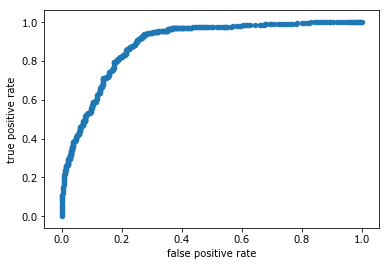

In [61]:
# выводим ROC-кривую для контрольной выборки
tmp = glm_model.roc(valid=True)
df = pd.DataFrame({'false positive rate': tmp[0], 'true positive rate': tmp[1]})
df.plot(kind='scatter', x='false positive rate', y='true positive rate')

## III.7. Вывод таблицы коэффициентов 

In [62]:
# записываем таблицу коэффициентов
coeff_table = glm_model._model_json['output']['coefficients_table']

# преобразуем таблицу коэффициентов в датафрейм pandas
coeff_table.as_data_frame()

,names,coefficients,standardized_coefficients
0,Intercept,-0.238659,-0.238659
1,gender_marital.Muzhskoj + Odinokij,-0.030990,-0.030990
2,gender_marital.Muzhskoj + Zhenat,-0.141462,-0.141462
3,gender_marital.Zhenskij + Odinokij,0.113565,0.113565
4,gender_marital.Zhenskij + Zhenat,0.085562,0.085562
5,pay.Auto,-0.276094,-0.276094
6,pay.CC,0.019070,0.019070
7,pay.CH,0.000000,0.000000
8,int_disc.Da,-0.066437,-0.066437
9,int_disc.Net,0.058695,0.058695


## III.7. Добавление взаимодействий признаков в модель

In [63]:
# еще можно добавлять взаимодействия признаков

# создаем экземпляр класса H2OGeneralizedLinearEstimator
glm_model2 = H2OGeneralizedLinearEstimator(family='binomial', 
                                           interactions=['gender_marital', 'pay', 'billtype']) 

# обучаем модель с взаимодействиями
glm_model2.train(predictors, dependent, training_frame=tr, 
                validation_frame=valid)

glm Model Build progress: |███████████████████████████████████████████████| 100%


In [64]:
# смотрим модель
glm_model2

Model Details
H2OGeneralizedLinearEstimator :  Generalized Linear Modeling
Model Key:  GLM_model_python_1550243175172_1476


ModelMetricsBinomialGLM: glm
** Reported on train data. **

MSE: 0.13133182779828867
RMSE: 0.3623973341489817
LogLoss: 0.411229128534296
Null degrees of freedom: 3101
Residual degrees of freedom: 3065
Null deviance: 4249.593703095778
Residual deviance: 2551.2655134267725
AIC: 2625.2655134267725
AUC: 0.8906590905921534
Gini: 0.7813181811843068
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.41218859634702454: 


,Остается,Уходит,Error,Rate
Остается,1277.0,472.0,0.2699,(472.0/1749.0)
Уходит,101.0,1252.0,0.0746,(101.0/1353.0)
Total,1378.0,1724.0,0.1847,(573.0/3102.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.4121886,0.8137797,237.0
max f2,0.2362725,0.8897552,286.0
max f0point5,0.5481480,0.7855708,174.0
max accuracy,0.4964697,0.8207608,200.0
max precision,0.9961684,1.0,0.0
max recall,0.0347062,1.0,380.0
max specificity,0.9961684,1.0,0.0
max absolute_mcc,0.4121886,0.6542018,237.0
max min_per_class_accuracy,0.5150292,0.8090337,191.0
max mean_per_class_accuracy,0.4121886,0.8277413,237.0


Gains/Lift Table: Avg response rate: 43,62 %, avg score: 43,62 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0109607,0.9911266,2.2926829,2.2926829,1.0,0.9927698,1.0,0.9927698,0.0251293,0.0251293,129.2682927,129.2682927
,2,0.0206319,0.9891999,2.2162602,2.2568598,0.9666667,0.9901259,0.984375,0.9915305,0.0214339,0.0465632,121.6260163,125.6859756
,3,0.0309478,0.9850583,2.2926829,2.2688008,1.0,0.9872348,0.9895833,0.9900986,0.0236511,0.0702143,129.2682927,126.8800813
,4,0.0402966,0.9825321,2.2926829,2.2743415,1.0,0.9836687,0.992,0.9886069,0.0214339,0.0916482,129.2682927,127.4341463
,5,0.0502901,0.9786293,2.0708104,2.2338962,0.9032258,0.9803553,0.9743590,0.9869671,0.0206948,0.1123429,107.0810386,123.3896185
,6,0.1009026,0.9531586,1.9860183,2.1095613,0.8662420,0.9686018,0.9201278,0.9777551,0.1005174,0.2128603,98.6018332,110.9561287
,7,0.1508704,0.8727416,1.9081039,2.0428393,0.8322581,0.9192775,0.8910256,0.9583875,0.0953437,0.3082040,90.8103855,104.2839275
,8,0.2005158,0.7594309,1.8311688,1.9904321,0.7987013,0.8092588,0.8681672,0.9214650,0.0909091,0.3991131,83.1168831,99.0432123
,9,0.3001289,0.6359207,1.7139474,1.8986665,0.7475728,0.6895187,0.8281418,0.8444817,0.1707317,0.5698448,71.3947431,89.8666527
,10,0.4000645,0.5564774,1.5678993,1.8160414,0.6838710,0.5942104,0.7921031,0.7819643,0.1566888,0.7265336,56.7899292,81.6041351




ModelMetricsBinomialGLM: glm
** Reported on validation data. **

MSE: 0.13122491308236564
RMSE: 0.3622497937644211
LogLoss: 0.41187468852361847
Null degrees of freedom: 1328
Residual degrees of freedom: 1292
Null deviance: 1821.8635267830318
Residual deviance: 1094.762922095778
AIC: 1168.762922095778
AUC: 0.8925633806704482
Gini: 0.7851267613408963
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.41111987261389576: 


,Остается,Уходит,Error,Rate
Остается,539.0,208.0,0.2784,(208.0/747.0)
Уходит,40.0,542.0,0.0687,(40.0/582.0)
Total,579.0,750.0,0.1866,(248.0/1329.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.4111199,0.8138138,245.0
max f2,0.2646767,0.8908228,285.0
max f0point5,0.5276149,0.7906977,192.0
max accuracy,0.5005102,0.8246802,208.0
max precision,0.9948570,1.0,0.0
max recall,0.0344062,1.0,377.0
max specificity,0.9948570,1.0,0.0
max absolute_mcc,0.4111199,0.6532031,245.0
max min_per_class_accuracy,0.5263620,0.8192771,193.0
max mean_per_class_accuracy,0.5005102,0.8282926,208.0


Gains/Lift Table: Avg response rate: 43,79 %, avg score: 44,58 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0105342,0.9919982,2.2835052,2.2835052,1.0,0.9935036,1.0,0.9935036,0.0240550,0.0240550,128.3505155,128.3505155
,2,0.0203160,0.9899973,2.2835052,2.2835052,1.0,0.9906835,1.0,0.9921458,0.0223368,0.0463918,128.3505155,128.3505155
,3,0.0308503,0.9859840,1.9572901,2.1721147,0.8571429,0.9881019,0.9512195,0.9907650,0.0206186,0.0670103,95.7290133,117.2114659
,4,0.0406321,0.9841464,2.2835052,2.1989309,1.0,0.9849343,0.9629630,0.9893613,0.0223368,0.0893471,128.3505155,119.8930890
,5,0.0504138,0.9812719,2.2835052,2.2153408,1.0,0.9827468,0.9701493,0.9880779,0.0223368,0.1116838,128.3505155,121.5340822
,6,0.1000752,0.9635425,2.1105123,2.1633207,0.9242424,0.9741662,0.9473684,0.9811743,0.1048110,0.2164948,111.0512340,116.3320673
,7,0.1504891,0.8818183,1.8063548,2.0437371,0.7910448,0.9368421,0.895,0.9663230,0.0910653,0.3075601,80.6354824,104.3737113
,8,0.2009029,0.7686930,1.9767657,2.0269315,0.8656716,0.8097157,0.8876404,0.9270246,0.0996564,0.4072165,97.6765656,102.6931542
,9,0.3009782,0.6474857,1.6482443,1.9010180,0.7218045,0.6997971,0.8325,0.8514714,0.1649485,0.5721649,64.8244322,90.1018041
,10,0.4003010,0.5595918,1.5396361,1.8113518,0.6742424,0.6052211,0.7932331,0.7903717,0.1529210,0.7250859,53.9636051,81.1351833



Scoring History: 


,timestamp,duration,iterations,negative_log_likelihood,objective
,2019-02-15 22:48:12,0.000 sec,0,2124.7968515,0.6849764
,2019-02-15 22:48:12,0.004 sec,1,1379.4013403,0.4458753
,2019-02-15 22:48:12,0.006 sec,2,1287.0346057,0.4169066
,2019-02-15 22:48:12,0.007 sec,3,1276.0877937,0.4138104
,2019-02-15 22:48:12,0.009 sec,4,1275.6369032,0.4137447
,2019-02-15 22:48:12,0.010 sec,5,1275.6327567,0.4137456


## III.8. Вычисление p-значений коэффициентов

In [65]:
# чтобы вычислить p-значения коэффициентов, нужно 
# задать параметр compute_p_values, отключить 
# регуляризацию (lambda_ = 0), задать метод наименьших 
# квадратов с итеративным пересчётом весов (solver='IRLSM'),
# рекомендуется задать параметр remove_collinear_columns

# создаем экземпляр класса H2OGeneralizedLinearEstimator
glm_model3 = H2OGeneralizedLinearEstimator(lambda_=0, family='binomial', solver='IRLSM',
                                           remove_collinear_columns=True,
                                           compute_p_values=True)
# обучаем модель
glm_model3.train(predictors, dependent, 
                 training_frame=tr, validation_frame=valid)

glm Model Build progress: |███████████████████████████████████████████████| 100%


In [66]:
# записываем таблицу коэффициентов
coeff_table = glm_model3._model_json['output']['coefficients_table']

# преобразуем таблицу коэффициентов в датафрейм pandas
coeff_table.as_data_frame()

,names,coefficients,std_error,z_value,p_value,standardized_coefficients
0,Intercept,-2.117293,0.192209,-11.015573,0.000000,-2.117293
1,gender_marital.Muzhskoj + Zhenat,-0.106969,0.166425,-0.642744,0.520390,-0.106969
2,gender_marital.Zhenskij + Odinokij,-6.743234,41.581080,-0.162171,0.871171,-6.743234
3,gender_marital.Zhenskij + Zhenat,-6.768117,41.580911,-0.162770,0.870700,-6.768117
4,pay.CC,0.309317,0.129537,2.387870,0.016946,0.309317
5,pay.CH,0.289699,0.153017,1.893242,0.058326,0.289699
6,int_disc.Net,0.133961,0.105839,1.265709,0.205617,0.133961
7,gender.Zhenskij,9.705759,41.580844,0.233419,0.815436,9.705759
8,marital.Zhenat,0.000000,NaN,NaN,NaN,0.000000
9,billtype.Bjudzhetnyj,-0.125891,0.098297,-1.280710,0.200296,-0.125891


## III.9. Решетчатый поиск

In [67]:
# импортируем класс H2OGridSearch для выполнения решетчатого поиска
from h2o.grid.grid_search import H2OGridSearch

# задаем сетку параметров, будем перебирать разные значения alpha,
# alpha определяет тип регуляризации: значение 1 соответствует 
# l1-регуляризации (лассо), значение 0 соответствует l2-регуляризации 
# (гребневой регрессии), промежуточное значение соответствует 
# комбинации штрафов l1 и l2 (эластичной сети)
hyper_parameters = {'alpha':[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]}

# создаем экземпляр класса H2OGridSearch, lambda_search 
# задает перебор значений lambda_ - силы регуляризации
gridsearch = H2OGridSearch(H2OGeneralizedLinearEstimator(family='binomial', solver='IRLSM', lambda_search=True),
                           grid_id='gr_search_out', hyper_params=hyper_parameters)
# подгоняем модели решетчатого поиска
gridsearch.train(predictors, dependent, 
                 training_frame=tr, 
                 nfolds=5, 
                 keep_cross_validation_predictions=True, 
                 seed=1000000)

glm Grid Build progress: |████████████████████████████████████████████████| 100%


In [68]:
# выводим результаты решетчатого поиска
gridsearch.show()

      alpha               model_ids              logloss
0     [1.0]  gr_search_out_model_10  0.42036386420076544
1     [0.9]   gr_search_out_model_9  0.42038378543003097
2     [0.8]   gr_search_out_model_8    0.420399982324524
3     [0.7]   gr_search_out_model_7  0.42042665707089355
4     [0.6]   gr_search_out_model_6   0.4204894050961309
5     [0.0]   gr_search_out_model_0   0.4204945615515041
6     [0.5]   gr_search_out_model_5   0.4205478185032139
7     [0.4]   gr_search_out_model_4   0.4205783514149432
8     [0.3]   gr_search_out_model_3   0.4206000942839808
9     [0.2]   gr_search_out_model_2  0.42061682075688056
10    [0.1]   gr_search_out_model_1   0.4206475885528135


In [69]:
# сортируем результаты решетчатого поиска
# по убывания AUC
gridperf = gridsearch.get_grid(sort_by="auc", decreasing=True)
gridperf

      alpha               model_ids                 auc
0     [0.2]   gr_search_out_model_2  0.8807662027969103
1     [0.0]   gr_search_out_model_0  0.8807309170861863
2     [0.3]   gr_search_out_model_3  0.8807294380444195
3     [0.5]   gr_search_out_model_5   0.880722465418947
4     [0.1]   gr_search_out_model_1  0.8807140137517077
5     [0.9]   gr_search_out_model_9  0.8807119008348979
6     [0.7]   gr_search_out_model_7  0.8807087314596832
7     [0.6]   gr_search_out_model_6  0.8807087314596832
8     [0.4]   gr_search_out_model_4  0.8807047169177445
9     [0.8]   gr_search_out_model_8  0.8806949975004194
10    [1.0]  gr_search_out_model_10  0.8806436536219409


## III.10. Извлечение наилучшей модели по итогам решетчатого поиска

In [70]:
# извлекаем наилучшую модель
best_model = gridperf.models[0]
best_model

Model Details
H2OGeneralizedLinearEstimator :  Generalized Linear Modeling
Model Key:  gr_search_out_model_2


ModelMetricsBinomialGLM: glm
** Reported on train data. **

MSE: 0.1327031788866307
RMSE: 0.36428447522043905
LogLoss: 0.41564127340581497
Null degrees of freedom: 3101
Residual degrees of freedom: 3078
Null deviance: 4249.593703095778
Residual deviance: 2578.638460209676
AIC: 2626.638460209676
AUC: 0.8852174846401513
Gini: 0.7704349692803025
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.431221232587885: 


,Остается,Уходит,Error,Rate
Остается,1299.0,450.0,0.2573,(450.0/1749.0)
Уходит,116.0,1237.0,0.0857,(116.0/1353.0)
Total,1415.0,1687.0,0.1825,(566.0/3102.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.4312212,0.8138158,251.0
max f2,0.2332115,0.8906079,295.0
max f0point5,0.4888696,0.7740558,226.0
max accuracy,0.4312212,0.8175371,251.0
max precision,0.9939005,1.0,0.0
max recall,0.0463991,1.0,376.0
max specificity,0.9939005,1.0,0.0
max absolute_mcc,0.4312212,0.6541189,251.0
max min_per_class_accuracy,0.5176895,0.8063562,210.0
max mean_per_class_accuracy,0.4312212,0.8284874,251.0


Gains/Lift Table: Avg response rate: 43,62 %, avg score: 43,62 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0103159,0.9900433,2.2926829,2.2926829,1.0,0.9915528,1.0,0.9915528,0.0236511,0.0236511,129.2682927,129.2682927
,2,0.0206319,0.9882756,2.2210366,2.2568598,0.96875,0.9892785,0.984375,0.9904157,0.0229120,0.0465632,122.1036585,125.6859756
,3,0.0306254,0.9836797,2.2926829,2.2685494,1.0,0.9858411,0.9894737,0.9889229,0.0229120,0.0694752,129.2682927,126.8549422
,4,0.0402966,0.9806982,2.0634146,2.2193171,0.9,0.9820261,0.968,0.9872677,0.0199557,0.0894309,106.3414634,121.9317073
,5,0.0506125,0.9768246,2.0060976,2.1758583,0.875,0.9786639,0.9490446,0.9855140,0.0206948,0.1101256,100.6097561,117.5858319
,6,0.1002579,0.9542407,2.0693697,2.1231276,0.9025974,0.9667958,0.9260450,0.9762452,0.1027347,0.2128603,106.9369655,112.3127598
,7,0.1505480,0.8510411,1.9252658,2.0570324,0.8397436,0.9161463,0.8972163,0.9561693,0.0968219,0.3096822,92.5265791,105.7032433
,8,0.2005158,0.7640198,1.7601888,1.9830602,0.7677419,0.7997220,0.8649518,0.9171833,0.0879527,0.3976349,76.0188828,98.3060152
,9,0.3007737,0.6301785,1.6218336,1.8626513,0.7073955,0.6835430,0.8124330,0.8393032,0.1626016,0.5602365,62.1833582,86.2651295
,10,0.4003868,0.5572786,1.5803931,1.7924276,0.6893204,0.5927999,0.7818035,0.7779751,0.1574279,0.7176644,58.0393085,79.2427634




ModelMetricsBinomialGLM: glm
** Reported on cross-validation data. **

MSE: 0.134553769999284
RMSE: 0.366815716674305
LogLoss: 0.42061682075688056
Null degrees of freedom: 3101
Residual degrees of freedom: 3079
Null deviance: 4251.626695674246
Residual deviance: 2609.506755975687
AIC: 2655.506755975687
AUC: 0.8807662027969103
Gini: 0.7615324055938206
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.39343547412569313: 


,Остается,Уходит,Error,Rate
Остается,1241.0,508.0,0.2905,(508.0/1749.0)
Уходит,88.0,1265.0,0.065,(88.0/1353.0)
Total,1329.0,1773.0,0.1921,(596.0/3102.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.3934355,0.8093410,261.0
max f2,0.1714847,0.8895706,303.0
max f0point5,0.4951287,0.7661344,219.0
max accuracy,0.4419400,0.8101225,242.0
max precision,0.9934520,1.0,0.0
max recall,0.0434876,1.0,380.0
max specificity,0.9934520,1.0,0.0
max absolute_mcc,0.3934355,0.6458847,261.0
max min_per_class_accuracy,0.5139378,0.7993139,209.0
max mean_per_class_accuracy,0.3990672,0.8223236,259.0


Gains/Lift Table: Avg response rate: 43,62 %, avg score: 43,65 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0103159,0.9904299,2.2926829,2.2926829,1.0,0.9918921,1.0,0.9918921,0.0236511,0.0236511,129.2682927,129.2682927
,2,0.0203095,0.9880529,2.2187254,2.2562911,0.9677419,0.9891418,0.9841270,0.9905387,0.0221729,0.0458241,121.8725413,125.6291134
,3,0.0303030,0.9839469,2.2926829,2.2682927,1.0,0.9858868,0.9893617,0.9890046,0.0229120,0.0687361,129.2682927,126.8292683
,4,0.0402966,0.9803074,1.9968529,2.2009756,0.8709677,0.9821087,0.96,0.9872944,0.0199557,0.0886918,99.6852872,120.0975610
,5,0.0502901,0.9767628,2.1447679,2.1898061,0.9354839,0.9785396,0.9551282,0.9855547,0.0214339,0.1101256,114.4767899,118.9806129
,6,0.1005803,0.9532408,2.0134459,2.1016260,0.8782051,0.9666580,0.9166667,0.9761063,0.1012565,0.2113821,101.3445904,110.1626016
,7,0.1502257,0.8605169,1.9502692,2.0516068,0.8506494,0.9160389,0.8948498,0.9562557,0.0968219,0.3082040,95.0269243,105.1606825
,8,0.2001934,0.7630032,1.7601888,1.9788696,0.7677419,0.7983615,0.8631240,0.9168457,0.0879527,0.3961567,76.0188828,97.8869644
,9,0.3001289,0.6345954,1.5900865,1.8494145,0.6935484,0.6856718,0.8066595,0.8398705,0.1589061,0.5550628,59.0086546,84.9414477
,10,0.4000645,0.5570861,1.5678993,1.7790924,0.6838710,0.5935846,0.7759871,0.7783487,0.1566888,0.7117517,56.7899292,77.9092392



Cross-Validation Metrics Summary: 


,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
accuracy,0.8148049,0.0120061,0.8089888,0.8330684,0.8265306,0.7847682,0.8206687
auc,0.8813921,0.0057572,0.8697383,0.8937027,0.8804005,0.8769200,0.8861992
err,0.1851951,0.0120061,0.1910112,0.1669316,0.1734694,0.2152318,0.1793313
err_count,114.8,7.2027774,119.0,105.0,102.0,130.0,118.0
f0point5,0.7602845,0.0193455,0.7640172,0.7931666,0.7670454,0.7097792,0.7674144
---,---,---,---,---,---,---,---
r2,0.4515439,0.0147684,0.4257407,0.4809559,0.4550543,0.4304840,0.4654846
recall,0.9142978,0.0140673,0.8888889,0.9059234,0.9492188,0.9183673,0.9090909
residual_deviance,521.7704,16.445288,547.4848,515.5303,487.42694,510.3067,548.1032
rmse,0.3669296,0.0044469,0.3768316,0.3588438,0.3660061,0.3705496,0.3624171



See the whole table with table.as_data_frame()
Scoring History: 


,timestamp,duration,iteration,lambda,predictors,deviance_train,deviance_test,deviance_xval,deviance_se
,2019-02-15 22:48:14,0.000 sec,1,",78E0",1,1.3699528,nan,1.3705044,0.0041932
,2019-02-15 22:48:14,0.001 sec,3,",71E0",2,1.3647697,nan,1.3698415,0.0044106
,2019-02-15 22:48:14,0.002 sec,5,",65E0",3,1.3570013,nan,1.3700023,0.0042693
,2019-02-15 22:48:14,0.002 sec,7,",59E0",5,1.3471990,nan,1.3675420,0.0048221
,2019-02-15 22:48:14,0.003 sec,9,",54E0",5,1.3296837,nan,1.3616148,0.0049210
---,---,---,---,---,---,---,---,---,---
,2019-02-15 22:48:14,0.094 sec,123,",66E-3",24,0.8313829,nan,0.8413160,0.0104273
,2019-02-15 22:48:14,0.095 sec,124,",6E-3",24,0.8313472,nan,0.8412901,0.0104526
,2019-02-15 22:48:14,0.097 sec,125,",55E-3",24,0.8313096,nan,0.8412708,0.0104757
,2019-02-15 22:48:14,0.099 sec,126,",5E-3",24,0.8312825,nan,0.8412518,0.0104985



See the whole table with table.as_data_frame()


In [71]:
# смотрим AUC наилучшей модели
# на контрольной выборке
bestmodel_perf = best_model.model_performance(valid)
print(bestmodel_perf.auc())

0.888042433192104


In [72]:
# смотрим оптимальное значение lambda и alpha
best_model.summary()['regularization']

['Elastic Net (alpha = 0.2, lambda = 5.001E-4 )']

# Этап IV. Построение модели логистической регрессии на всей исторической выборке и применение к новым данным с помощью класса H2OGeneralizedLinearEstimator библиотеки h2o

## IV.1. Транслитерация строковых значений в предварительно подготовленных исторических данных

In [73]:
# выполняем транслитерацию
for i in cat_cols:
    fulldata[i] = fulldata[i].apply(lambda x: translit(x, 'ru', reversed=True))

## IV.2. Преобразование всех предварительно подготовленных исторических данных во фрейм H2O

In [74]:
# преобразовываем датафрейм pandas во фрейм h2o -
# специальную структуру данных, используемую h2o
fullframe = h2o.H2OFrame(fulldata)

Parse progress: |█████████████████████████████████████████████████████████| 100%


## IV.3. Обучение модели логистической регрессии на всех исторических данных

In [75]:
# создаем и обучаем модель
full_glm_model = H2OGeneralizedLinearEstimator(family='binomial', solver='IRLSM', 
                                               model_id='logreg_churn', alpha=0.2, lambda_=5.001E-4)
full_glm_model.train(predictors, dependent, 
                     training_frame=fullframe)

glm Model Build progress: |███████████████████████████████████████████████| 100%


In [76]:
# смотрим модель
full_glm_model

Model Details
H2OGeneralizedLinearEstimator :  Generalized Linear Modeling
Model Key:  logreg_churn


ModelMetricsBinomialGLM: glm
** Reported on train data. **

MSE: 0.1326805176442701
RMSE: 0.3642533701206759
LogLoss: 0.41574911144153176
Null degrees of freedom: 4430
Residual degrees of freedom: 4407
Null deviance: 6071.452249213392
Residual deviance: 3684.3686255948546
AIC: 3732.3686255948546
AUC: 0.8861860630755979
Gini: 0.7723721261511958
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.39805432404468455: 


,Остается,Уходит,Error,Rate
Остается,1822.0,674.0,0.27,(674.0/2496.0)
Уходит,126.0,1809.0,0.0651,(126.0/1935.0)
Total,1948.0,2483.0,0.1805,(800.0/4431.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.3980543,0.8189226,255.0
max f2,0.3297068,0.8908461,278.0
max f0point5,0.5231910,0.7783817,199.0
max accuracy,0.3980543,0.8194538,255.0
max precision,0.9941308,1.0,0.0
max recall,0.0454628,1.0,377.0
max specificity,0.9941308,1.0,0.0
max absolute_mcc,0.3980543,0.6643619,255.0
max min_per_class_accuracy,0.5072515,0.8084936,208.0
max mean_per_class_accuracy,0.3980543,0.8324258,255.0


Gains/Lift Table: Avg response rate: 43,67 %, avg score: 43,67 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0101557,0.9909481,2.2899225,2.2899225,1.0,0.9925473,1.0,0.9925473,0.0232558,0.0232558,128.9922481,128.9922481
,2,0.0203114,0.9887011,2.1372610,2.2135917,0.9333333,0.9898504,0.9666667,0.9911988,0.0217054,0.0449612,113.7260982,121.3591731
,3,0.0304672,0.9852840,2.2899225,2.2390353,1.0,0.9867350,0.9777778,0.9897109,0.0232558,0.0682171,128.9922481,123.9035314
,4,0.0406229,0.9814906,2.1372610,2.2135917,0.9333333,0.9831908,0.9666667,0.9880809,0.0217054,0.0899225,113.7260982,121.3591731
,5,0.0501016,0.9778882,2.1263566,2.1970878,0.9285714,0.9796556,0.9594595,0.9864869,0.0201550,0.1100775,112.6356589,119.7087785
,6,0.1006545,0.9548709,2.0445736,2.1204888,0.8928571,0.9685293,0.9260090,0.9774678,0.1033592,0.2134367,104.4573643,112.0488754
,7,0.1500790,0.8672520,1.9134969,2.0523215,0.8356164,0.9201326,0.8962406,0.9585860,0.0945736,0.3080103,91.3496867,105.2321501
,8,0.2006319,0.7619174,1.7890019,1.9859733,0.78125,0.8090032,0.8672666,0.9208958,0.0904393,0.3984496,78.9001938,98.5973265
,9,0.3001580,0.6329626,1.6356589,1.8698164,0.7142857,0.6871903,0.8165414,0.8434040,0.1627907,0.5612403,63.5658915,86.9816401
,10,0.4003611,0.5507064,1.5627174,1.7929551,0.6824324,0.5901277,0.7829763,0.7800135,0.1565891,0.7178295,56.2717369,79.2955088



Scoring History: 


,timestamp,duration,iterations,negative_log_likelihood,objective
,2019-02-15 22:48:22,0.000 sec,0,3035.7261246,0.6851108
,2019-02-15 22:48:22,0.002 sec,1,1986.8008860,0.4493533
,2019-02-15 22:48:22,0.003 sec,2,1856.9747686,0.4208864
,2019-02-15 22:48:22,0.004 sec,3,1842.7119949,0.4180962
,2019-02-15 22:48:22,0.005 sec,4,1842.1978486,0.4180482
,2019-02-15 22:48:22,0.006 sec,5,1842.1843128,0.4180472


In [77]:
# при желании модель можно сохранить в папку
# и воспользоваться ей позднее, когда 
# появятся новые данные
h2o.save_model(full_glm_model, path='mybest_model', force=True)

'/Users/artemgruzdev/Learning_pandas_russian_translation/Notebooks/mybest_model/logreg_churn'

## IV.4. Транслитерация строковых значений в предварительно подготовленных новых данных

In [78]:
# выполняем транслитерацию
for i in cat_cols:
    newdata[i] = newdata[i].apply(lambda x: translit(x, 'ru', reversed=True))

## IV.5. Преобразование новых данных во фрейм H2O

In [79]:
# преобразовываем датафрейм pandas с новыми данными во фрейм h2o -
# специальную структуру данных, используемую h2o
newframe = h2o.H2OFrame(newdata)

Parse progress: |█████████████████████████████████████████████████████████| 100%


## IV.6. Применение модели логистической регрессии, построенной на всех исторических данных, к новым данным

In [80]:
# вычисляем вероятности классов для новых данных
predictions = full_glm_model.predict(newframe)
predictions

glm prediction progress: |████████████████████████████████████████████████| 100%


predict,Остается,Уходит
Уходит,0.0354968,0.964503
Уходит,0.0331904,0.96681
Остается,0.926848,0.0731524
Остается,0.959278,0.0407219
Уходит,0.00971522,0.990285
Остается,0.893969,0.106031
Уходит,0.533763,0.466237
Уходит,0.139249,0.860751
Уходит,0.2574,0.7426
Уходит,0.326836,0.673164


In [81]:
# а еще можно выгрузить ранее сохраненную модель
# и применить к новым данным
savedmodel = h2o.load_model(path='/Users/artemgruzdev/'
                            'Learning_pandas_russian_translation/'
                            'Notebooks/mybest_model/logreg_churn')
predictions2 = savedmodel.predict(newframe)
predictions2

glm prediction progress: |████████████████████████████████████████████████| 100%


predict,Остается,Уходит
Уходит,0.0354968,0.964503
Уходит,0.0331904,0.96681
Остается,0.926848,0.0731524
Остается,0.959278,0.0407219
Уходит,0.00971522,0.990285
Остается,0.893969,0.106031
Уходит,0.533763,0.466237
Уходит,0.139249,0.860751
Уходит,0.2574,0.7426
Уходит,0.326836,0.673164


#### Больше материалов о машинном обучении и информацию о курсах по машинному обучению можно найти в нашей группе в Facebook https://www.facebook.com/groups/gewissta